# Problem 1.7a $x=y^3$

In [79]:
pwd

'C:\\Users\\Jinpy\\anaconda_projects\\b6278e7b-1556-4d02-9081-8c9d8ffc56c8'

In [31]:
#1.7a
import numpy as np
from matplotlib import pyplot as plt
import math

def newton(f, df, x0, errorTolerance=1e-8, maxIterations=100, demoMode=False):
    x = x0
    iterations = 0
    error = float('inf')
    
    while error > errorTolerance and iterations < maxIterations:
        fx = f(x)
        dfx = df(x)
        
        if dfx == 0:
            raise ValueError("Derivative is zero. Newton's method fails.")
        
        x_new = x - fx / dfx
        error = abs(x_new - x)
        x = x_new
        iterations += 1
        
        if demoMode:
            print(f"Iteration {iterations}: x = {x}, f(x) = {f(x)}, error = {error}")
    
    return x, error, iterations

def f_1(x): 
    return math.exp(x) + 2*x 

def Df_1(x): 
    return math.exp(x) + 2   

(root, errorEstimate, iterations) = newton(f_1, Df_1, x0=0., errorTolerance=1e-8, demoMode=True)
print()
print(f"The mininmum x value is approximately {root}")
print(f"The estimated absolute error is {errorEstimate:0.3}")
print(f"The backward error is {abs(f_1(root)):0.3}")
print(f"This required {iterations} iterations")


Iteration 1: x = -0.3333333333333333, f(x) = 0.04986464390712264, error = 0.3333333333333333
Iteration 2: x = -0.3516893315554154, f(x) = 0.00011997974912580922, error = 0.01835599822208206
Iteration 3: x = -0.35173371099294265, f(x) = 6.927720619387401e-10, error = 4.437943752727547e-05
Iteration 4: x = -0.3517337112491958, f(x) = 1.1102230246251565e-16, error = 2.56253129826689e-10

The root is approximately -0.3517337112491958
The estimated absolute error is 2.56e-10
The backward error is 1.11e-16
This required 4 iterations


In [90]:
#1.7b
import numpy as np
from matplotlib import pyplot as plt
import cmath

def newton(f, df, x0, errorTolerance=1e-8, maxIterations=100, demoMode=False):
    x = x0
    iterations = 0
    error = float('inf')

    while error > errorTolerance and iterations < maxIterations:
        fx = f(x)
        dfx = df(x)
        
        if dfx == 0:
            raise ValueError("Derivative is zero")
        
        x_new = x - fx / dfx
        error = abs(x_new - x)
        x = x_new
        iterations += 1
        
        if demoMode:
            print(f"Iteration {iterations}: x = {x}, f(x) = {f(x)}, error = {error}")
    
    return x, error, iterations

def f_2(x): 
    return math.cos(x)-.2*x

def Df_2(x): 
    return -math.sin(x)-.2  

(root, errorEstimate, iterations) = newton(f_2, Df_2, x0=-1., errorTolerance=1e-8, demoMode=True)
print()
print(f"The first root is approximately {root}")
if Df_2(root)<0: 
    print(f"{root} is a max")
if Df_2(root)>0:
    print(f"{root} is a min")

(root2, errorEstimate2, iterations2) = newton(f_2, Df_2, x0=-5, errorTolerance=1e-8, demoMode=True)
print()
print(f"The second root is {root2}")
if Df_2(root2)<0: 
    print(f"{root2} is a max")
if Df_2(root2)>0:
    print(f"{root2} is a min")

(root3, errorEstimate3, iterations3) = newton(f_2,Df_2, x0=5, errorTolerance=1e-8, demoMode=True)
print()
print(f"The third root is approximately {root3}")
if Df_2(root3)<0: 
    print(f"{root3} is a max")
if Df_2(root3)>0:
    print(f"{root3} is a min")

Iteration 1: x = -2.1540698229551887, f(x) = -0.11994518833475915, error = 1.1540698229551887
Iteration 2: x = -1.9650798262218474, f(x) = 0.008869202721905112, error = 0.18898999673334127
Iteration 3: x = -1.9773424358600078, f(x) = 2.9165760967231336e-05, error = 0.012262609638160393
Iteration 4: x = -1.9773830288753655, f(x) = 3.258112668547142e-10, error = 4.0593015357748286e-05
Iteration 5: x = -1.977383029328841, f(x) = 0.0, error = 4.5347547938945354e-10

The first root is approximately -1.977383029328841
-1.977383029328841 is a min
Iteration 1: x = -3.892367505343397, f(x) = 0.047313020781781234, error = 1.107632494656603
Iteration 2: x = -3.838737120502496, f(x) = 0.0010687726806446474, error = 0.05363038484090099
Iteration 3: x = -3.837467841057185, f(x) = 6.178053383321114e-07, error = 0.0012692794453110778
Iteration 4: x = -3.837467106499295, f(x) = 2.070565940925917e-13, error = 7.345578900697092e-07
Iteration 5: x = -3.837467106499049, f(x) = 1.1102230246251565e-16, error

In [44]:
#1.9
import numpy as np

def f(theta):
    theta1 = theta[0]
    theta2 = theta[1]
    return theta1**2 + 4*theta2**2 + 2*theta1*theta2 + 3*theta1 - theta2 + 5

def gradient(theta):
    theta1 = theta[0]
    theta2 = theta[1]
    d_theta1 = 2*theta1 + 2*theta2 + 3
    d_theta2 = 8*theta2 + 2*theta1 - 1
    return np.array([d_theta1, d_theta2])

def gradient_descent(initial_theta, learning_rate, n_iterations, tolerance=1e-6):
    theta = np.array(initial_theta, dtype=float)
    history = [theta.copy()]

    for i in range(n_iterations):
        grad = gradient(theta)
        theta = theta - learning_rate * grad
        history.append(theta.copy())

        if np.linalg.norm(grad) < tolerance:
            print(f"Converged after {i+1} iterations.")
            break

    return theta, history

initial_theta = np.array([0.0, 0.0])
learning_rate = 0.02
n_iterations = 1000

theta_min_gd, history = gradient_descent(initial_theta, learning_rate, n_iterations)
min_value_gd = f(theta_min_gd)

print(f"Minimum found at theta (GD): [{theta_min_gd[0]:.4f}, {theta_min_gd[1]:.4f}]")
print(f"Minimum value (GD): {min_value_gd:.4f}")

theta_min_analytic = np.array([-13/6, 2/3])
min_value_analytic = f(theta_min_analytic)

print(f"Minimum found at theta (Analytic): [{theta_min_analytic[0]:.4f}, {theta_min_analytic[1]:.4f}]")
print(f"Minimum value (Analytic): {min_value_analytic:.4f}")

Converged after 531 iterations.
Minimum found at theta (GD): [-2.1667, 0.6667]
Minimum value (GD): 1.4167
Minimum found at theta (Analytic): [-2.1667, 0.6667]
Minimum value (Analytic): 1.4167


In [145]:
#1.10
import numpy as np

def f(theta):
    theta1=theta[0]
    theta2=theta[1]
    theta3=theta[2]
    theta4=theta[3]
    return theta1**2 + 3*theta2**2 + 2*theta3**2 + theta4**2 + theta1*theta2 - 2*theta2*theta3 + theta3*theta4 - 4*theta1 + theta2 + 2*theta3 - theta4 + 10

def gradient (theta):
    theta1=theta[0]
    theta2=theta[1]
    theta3=theta[2]
    theta4=theta[3]
    d_theta1 = 2*theta1+theta2-4
    d_theta2 = 6*theta2+theta1-2*theta3+1
    d_theta3 = 4*theta3-2*theta2+theta4+2
    d_theta4 = 2*theta4+theta3-1
    return np.array([d_theta1, d_theta2, d_theta3, d_theta4])

def gradient_descent(initial_theta = np.array([0.0,0.0,0.0,0.0]), learning_rate = .0001, n_iterations = 1000, tolerance=1e-10):
    theta = np.array(initial_theta, dtype=float)
    history = [theta.copy()]
    for i in range(n_iterations):
        grad = gradient(theta)
        theta = theta - learning_rate * grad
        history.append(theta.copy())

        if np.linalg.norm(grad) < tolerance:
            print(f"Converged after {i+1} iterations.")
            break

    return theta, history
initial_theta = np.array([0.0, 0.0, 0.0, 0.0])
learning_rate = .2
n_iterations = 100000
theta_min_gd, history = gradient_descent(initial_theta, learning_rate, n_iterations)
min_value_gd = f(theta_min_gd)

print(f"Minimum found at theta (GD): [{theta_min_gd[0]:.4f}, {theta_min_gd[1]:.4f},  {theta_min_gd[2]:.4f}, {theta_min_gd[3]:.4f}]")
print(f"Minimum value (GD): {min_value_gd:.4f}")
    
    

Converged after 81 iterations.
Minimum found at theta (GD): [2.5082, -1.0164,  -1.2951, 1.1475]
Minimum value (GD): 2.6066


In [73]:
#1.2
import numpy as np

v = np.arange(1, 2346, 2)

dimension = v.shape[0]
print(f"The dimension of vector v is: {dimension}")

l1_norm = np.linalg.norm(v, ord=1)
print(f"The L1 norm of v is: {l1_norm}")

l2_norm = np.linalg.norm(v, ord=2)
print(f"The L2 norm of v is: {l2_norm}")

inf_norm = np.linalg.norm(v, ord=np.inf)
print(f"The infinity norm of v is: {inf_norm}")

The dimension of vector v is: 1173
The L1 norm of v is: 1375929.0
The L2 norm of v is: 46389.14274913905
The infinity norm of v is: 2345.0


In [74]:
#1.5
import numpy as np
from matplotlib import pyplot as plt
import math

def newton(f, df, x0, errorTolerance=1e-8, maxIterations=100, demoMode=False):
    x = x0
    iterations = 0
    error = float('inf')
    
    while error > errorTolerance and iterations < maxIterations:
        fx = f(x)
        dfx = df(x)
        
        if dfx == 0:
            raise ValueError("Derivative is zero. Newton's method fails.")
        
        x_new = x - fx / dfx
        error = abs(x_new - x)
        x = x_new
        iterations += 1
        
        if demoMode:
            print(f"Iteration {iterations}: x = {x}, f(x) = {f(x)}, error = {error}")
    
    return x, error, iterations

def f_1(x): 
    return x**3+x-1 

def Df_1(x): 
    return 3*x**2+1  

(root, errorEstimate, iterations) = newton(f_1, Df_1, x0=0., errorTolerance=1e-8, demoMode=True)
print()
print(f"The root is approximately {root}")
print(f"The estimated absolute error is {errorEstimate:0.3}")
print(f"The backward error is {abs(f_1(root)):0.3}")
print(f"This required {iterations} iterations")


Iteration 1: x = 1.0, f(x) = 1.0, error = 1.0
Iteration 2: x = 0.75, f(x) = 0.171875, error = 0.25
Iteration 3: x = 0.686046511627907, f(x) = 0.008941036638283384, error = 0.06395348837209303
Iteration 4: x = 0.6823395825973142, f(x) = 2.823062168566537e-05, error = 0.003706929030592776
Iteration 5: x = 0.6823278039465127, f(x) = 2.839946056099052e-10, error = 1.1778650801486101e-05
Iteration 6: x = 0.6823278038280194, f(x) = 2.220446049250313e-16, error = 1.1849332626212572e-10

The root is approximately 0.6823278038280194
The estimated absolute error is 1.18e-10
The backward error is 2.22e-16
This required 6 iterations


In [82]:
#1.6
import numpy as np

def f_1(x):
    return 4*x**4 - 6*x**2 + 3*x - 11/4

def Df_1(x):
    return 16*x**3 - 12*x + 3

def newton(f, df, initial_x, errorTolerance=1e-8, maxIterations=100, demoMode=False):
    solution = []
    x = initial_x
    iterations = 0
    error = float('inf')

    while error > errorTolerance and iterations < maxIterations:
        fx = f(x)
        dfx = df(x)

        if dfx == 0:
            raise ValueError("Derivative is zero. Newton's method fails.")

        x_new = x - fx / dfx
        error = abs(x_new - x)
        x = x_new
        iterations += 1
        solution.append(x_new)

        if demoMode:
            print(f"Iteration ({iterations}): x = {x:.8f}, f(x) = {fx:.8f}, error = {error:.8f}")

    if demoMode:
        print(f"The solutions are: {solution}")

    return x, solution

if __name__ == "__main__":
    results = []
    initial_guesses = np.linspace(-10, 10, 5) # Trying a few initial guesses

    for x0 in initial_guesses:
        try:
            root, history = newton(f_1, Df_1, x0, demoMode=True)
            print(f"\nFound root starting from x0 = {x0:.2f}: {root:.8f} after {len(history)} iterations.")
            results.append(root)
        except ValueError as e:
            print(f"\nError starting from x0 = {x0:.2f}: {e}")

    print("\nAll found roots:", np.unique(np.round(results, 6)))

Iteration (1): x = -7.52048561, f(x) = 39367.25000000, error = 2.47951439
Iteration (2): x = -5.66857310, f(x) = 12430.43774878, error = 1.85191251
Iteration (3): x = -4.29078603, f(x) = 3917.49498763, error = 1.37778707
Iteration (4): x = -3.27401255, f(x) = 1229.74939666, error = 1.01677348
Iteration (5): x = -2.53692670, f(x) = 382.71442229, error = 0.73708585
Iteration (6): x = -2.02458334, f(x) = 116.71147096, error = 0.51234336
Iteration (7): x = -1.70426914, f(x) = 33.78778502, error = 0.32031420
Iteration (8): x = -1.55260680, f(x) = 8.45524749, error = 0.15166234
Iteration (9): x = -1.51672910, f(x) = 1.37238778, error = 0.03587769
Iteration (10): x = -1.51483440, f(x) = 0.06560645, error = 0.00189470
Iteration (11): x = -1.51482927, f(x) = 0.00017650, error = 0.00000512
Iteration (12): x = -1.51482927, f(x) = 0.00000000, error = 0.00000000
The solutions are: [-7.520485608112364, -5.668573099990313, -4.290786034028045, -3.2740125516708014, -2.5369266992743533, -2.0245833414397

In [126]:
#1.8a
import numpy as np

def f(x):
    x=x[0]
    return math.exp(x) + x**2

def gradient (x):
    x=x[0]
    d_x = math.exp(x) + 2*x
    return np.array([d_x])

def gradient_descent(initial_x = np.array([0.0]), learning_rate = .0001, n_iterations = 1000, tolerance=1e-6):
    x = np.array(initial_x, dtype=float)
    history = [x.copy()]
    for i in range(n_iterations):
        grad = gradient(x)
        x = x - learning_rate * grad
        history.append(x.copy())

        if np.linalg.norm(grad) < tolerance:
            print(f"Converged after {i+1} iterations.")
            break

    return x, history
initial_x = np.array([0.0])
learning_rate = .1
n_iterations = 10000
x_min_gd, history = gradient_descent(initial_x, learning_rate, n_iterations)
min_value_gd = f(x_min_gd)

print(f"Minimum found at x (GD): [{x_min_gd[0]:.4f}]")
print(f"Minimum value (GD): {min_value_gd:.4f}")

Converged after 45 iterations.
Minimum found at x (GD): [-0.3517]
Minimum value (GD): 0.8272


In [131]:
#1.8a
import numpy as np

def f(x):
    x=x[0]
    return math.sin(x)-.1*x**2

def gradient (x):
    x=x[0]
    d_x = math.cos(x)-.2*x
    return np.array([d_x])

def gradient_descent(initial_x = np.array([0.0]), learning_rate = .0001, n_iterations = 1000, tolerance=1e-6):
    x = np.array(initial_x, dtype=float)
    history = [x.copy()]
    for i in range(n_iterations):
        grad = gradient(x)
        x = x - learning_rate * grad
        history.append(x.copy())

        if np.linalg.norm(grad) < tolerance:
            print(f"Converged after {i+1} iterations.")
            break

    return x, history
initial_x = np.array([0.0])
learning_rate = 1
n_iterations = 10000
x_min_gd, history = gradient_descent(initial_x, learning_rate, n_iterations)
min_value_gd = f(x_min_gd)

print(f"Minimum found at x (GD): [{x_min_gd[0]:.4f}]")
print(f"Minimum value (GD): {min_value_gd:.4f}")

Converged after 13 iterations.
Minimum found at x (GD): [-1.9774]
Minimum value (GD): -1.3095


In [132]:
import numpy as np

def midpoint_quadrature (f, a, b, n):
    h=(b-a)/n
    integral_sum=0
    for i in range(n):
        midpoint = a+(i+.5)*h
        integral_sum+=f(midpoint)
    print(f"The midpoint integration is {h*integral_sum}")
    return h*integral_sum

def f(x):
    return x**2

result = midpoint_quadrature(f, a=0, b=2, n=12)
print(f"The final midpoint integration result is: {result}")

The midpoint integration is 2.6620370370370368
The final midpoint integration result is: 2.6620370370370368


Convolution at t = 0.01, x = 1: 1.000000
Convolution at t = 0.1, x = 1: 0.987478
Convolution at t = 1, x = 1: 0.760296
Convolution at t = 10, x = 1: 0.566387
Calculating convolution for t = 0.1 across x_values...


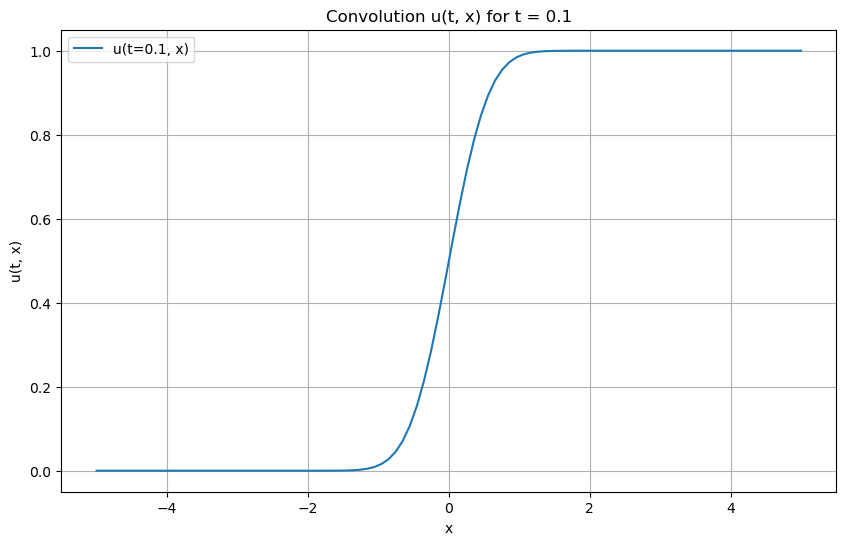

In [233]:
#2.2
import numpy as np

def gaussian_kernel(t, x):
    if t <= 0:
        return 0 
    return (1 / np.sqrt(4 * np.pi * t)) * np.exp(-(x**2) / (4 * t))

def f_step(tau):
    return 1 if tau > 0 else 0

def convolution_midpoint_quadrature(t, x, n):
    a = 0.0
    b = 10
    h = (b - a) / n
    integral_sum = 0.0

    for i in range(n):
        midpoint_tau = a + (i + 0.5) * h
        integral_sum += gaussian_kernel(t, x - midpoint_tau) * f_step(midpoint_tau) 

    return h * integral_sum

if __name__ == '__main__':
    t_values = [0.01,0.1, 1, 10]  
    x_value = 1   
    n_subintervals = 100  

    for t in t_values:
        convolution_result = convolution_midpoint_quadrature(t, x_value, n_subintervals)
        print(f"Convolution at t = {t}, x = {x_value}: {convolution_result:.6f}")


    x_values_for_plot = np.linspace(-5, 5, 100)

    t_for_plot = .1

    u_values_at_t = []

    print(f"Calculating convolution for t = {t_for_plot} across x_values...")
    for x_point in x_values_for_plot:
        conv_val = convolution_midpoint_quadrature(t_for_plot, x_point, n_subintervals)
        u_values_at_t.append(conv_val)

   
    u_values_at_t = np.array(u_values_at_t)

    plt.figure(figsize=(10, 6)) 
    plt.plot(x_values_for_plot, u_values_at_t, label=f'u(t={t_for_plot}, x)')
    plt.xlabel('x')
    plt.ylabel('u(t, x)')
    plt.title(f'Convolution u(t, x) for t = {t_for_plot}')
    plt.grid(True)
    plt.legend()
    plt.show()

Evaluating convolution at (x, y) = (1.0, 1.0)
  For t = 0.1: Convolution value = 0.24999613
  For t = 1.0: Convolution value = 0.17753761
  For t = 10.0: Convolution value = 0.02980447
Is loading. WAIT


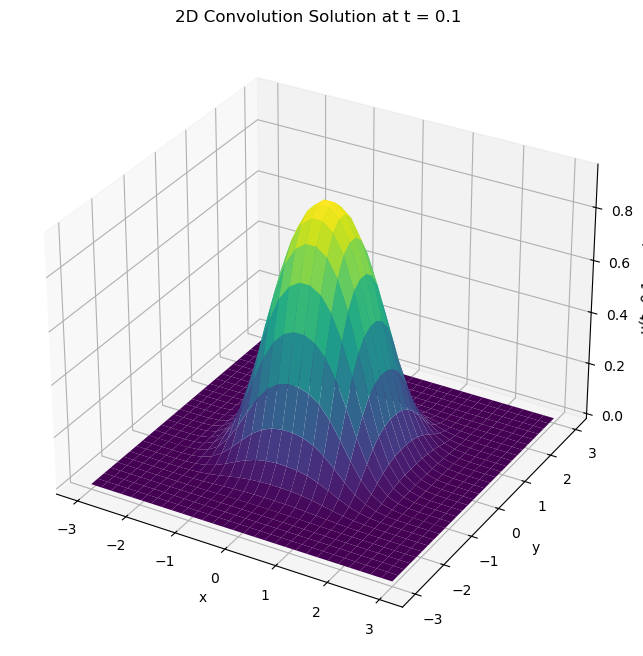

In [228]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def gaussian_kernel(t, x, y):
    if t <= 0:
        return 0 
    return (1 /(4 * np.pi * t)) * np.exp(-(x**2+y**2) / (4 * t))

def function(x_val, y_val):
    if -1<=x_val<=1 and -1<=y_val<=1:
             return 1
    else:
             return 0

def convolution_midpoint_quadrature(t, val1_x, val1_y, n_tau_x, n_tau_y):
    tau_x_min, tau_x_max = -1.0, 1.0
    tau_y_min, tau_y_max = -1.0, 1.0
    h_tau_x = (tau_x_max - tau_x_min) / n_tau_x
    h_tau_y = (tau_y_max - tau_y_min) / n_tau_y
    integral_sum= 0.0

    for i in range(n_tau_x):
        midpoint_tau_x = tau_x_min + (i + 0.5) * h_tau_x
        for j in range(n_tau_y):
            midpoint_tau_y = tau_y_min + (j+.5) * h_tau_y
            integral_sum += gaussian_kernel(t , val1_x - midpoint_tau_x, val1_y - midpoint_tau_y) * function(midpoint_tau_x, midpoint_tau_y)
            
       
    return h_tau_x * h_tau_y * integral_sum

if __name__ == '__main__':
    val1_x_point = 1.0
    val1_y_point = 1.0

    n_subintervals_tau_x = 100
    n_subintervals_tau_y = 100

    print(f"Evaluating convolution at (x, y) = ({val1_x_point}, {val1_y_point})")

    t_values_to_test = [0.1, 1.0, 10.0]

    for t_val in t_values_to_test:
        convolution_result = convolution_midpoint_quadrature(t_val, val1_x_point, val1_y_point, n_subintervals_tau_x, n_subintervals_tau_y)
        print(f"  For t = {t_val}: Convolution value = {convolution_result:.8f}")

    x_range = np.linspace(-3, 3, 30) 
    y_range = np.linspace(-3, 3, 30)
    X, Y = np.meshgrid(x_range, y_range) 

    t_for_3d_plot = .1 

    Z = np.zeros_like(X)
    print("Is loading. WAIT")
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i, j] = convolution_midpoint_quadrature(t_for_3d_plot, X[i, j], Y[i, j], n_subintervals_tau_x, n_subintervals_tau_y)

    fig = plt.figure(figsize=(10, 8)) 
    ax = fig.add_subplot(111, projection='3d') 

   
    ax.plot_surface(X, Y, Z, cmap='viridis')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel(f'u(t={t_for_3d_plot}, x, y)')
    ax.set_title(f'2D Convolution Solution at t = {t_for_3d_plot}')

    plt.show()

In [19]:
from PIL import Image

image = Image.open(r"C:\Users\Jinpy\download.jpg")

width, height = image.size

new_width = width * 2
new_height = height * 2

new_size = (new_width, new_height)

resized_image = image.resize(new_size)

resized_image.save("enlarged_image.jpg")

resized_image.show()


Original image shape: (148, 264)
Padded image shape: (168, 284)

Performing 2D convolution...
Convolution complete.


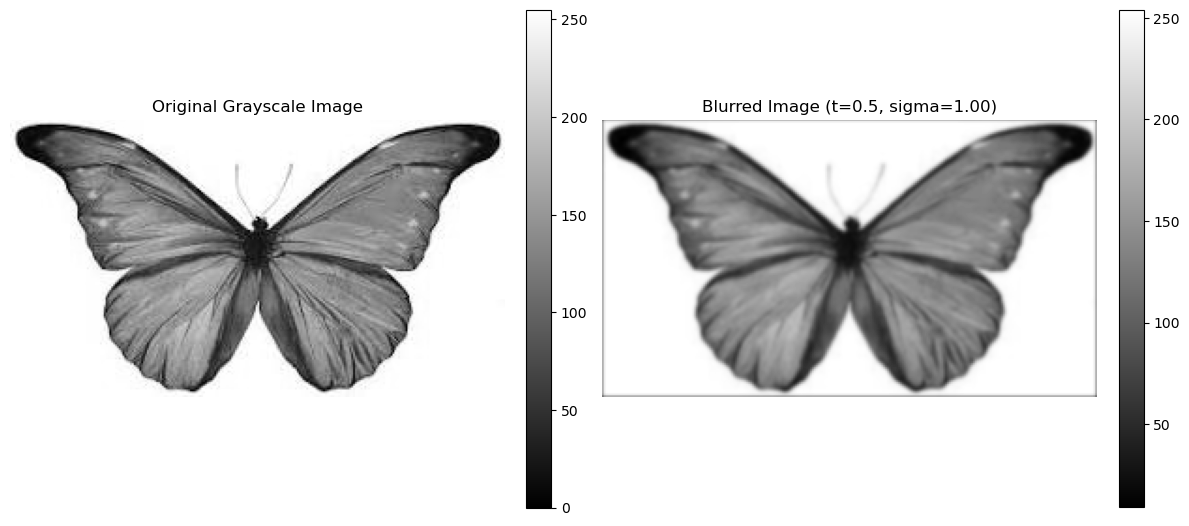

In [76]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


def load_and_prepare_image(image_path, pad_width):
    try:
        img = Image.open(image_path)
        img_gray = img.convert('L')
        img_array = np.array(img_gray)

        padded_img_array = np.pad(img_array, pad_width, mode='constant', constant_values=0)

        print(f"Original image shape: {img_array.shape}")
        print(f"Padded image shape: {padded_img_array.shape}")
        return img_array, padded_img_array
    except FileNotFoundError:
        print(f"Error: Image file not found at {image_path}. Please check the path.")
        return None, None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None, None

def create_gaussian_kernel(sigma, kernel_size):
    if kernel_size % 2 == 0:
        raise ValueError("Kernel size must be an odd number.")

    coords = np.linspace(-(kernel_size // 2), (kernel_size // 2), kernel_size)
    X, Y = np.meshgrid(coords, coords)

    gaussian_values = (1 /(2 * np.pi * sigma**2)) * np.exp(-(X**2+Y**2) / (2*sigma**2))

    kernel = gaussian_values / np.sum(gaussian_values)

    return kernel

def convolve_2d(image_array, kernel):
    image_height, image_width = image_array.shape
    kernel_height, kernel_width = kernel.shape
    
    pad_amount = (kernel_height - 1) // 2

    output_height = image_height - 2 * pad_amount
    output_width = image_width - 2 * pad_amount
    
    output_image = np.zeros((output_height, output_width), dtype=image_array.dtype)

    for i in range(output_height):
        for j in range(output_width):
            window = image_array[i : i + kernel_height, j : j + kernel_width]
            
            output_image[i, j] = np.sum(window * kernel)

    return output_image


def display_images(original_img_array, blurred_img_array, t_val, sigma_val):

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    ax1 = axes[0]
    im1 = ax1.imshow(original_img_array, cmap='gray')
    ax1.set_title("Original Grayscale Image")
    ax1.axis('off') 

    ax2 = axes[1]
    im2 = ax2.imshow(blurred_img_array, cmap='gray')
    ax2.set_title(f"Blurred Image (t={t_val}, sigma={sigma_val:.2f})")
    ax2.axis('off')

    fig.colorbar(im1, ax=ax1, orientation='vertical', fraction=0.046, pad=0.04)
    fig.colorbar(im2, ax=ax2, orientation='vertical', fraction=0.046, pad=0.04)

    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    image_file = r"C:\Users\Jinpy\download.jpg" 

    sigma = 1
    kernel_size = 21
    t_equivalent = sigma**2 / 2

    pad_width = (kernel_size - 1) // 2

    original_image_array, padded_image_array = load_and_prepare_image(image_file, pad_width)

    if original_image_array is not None and padded_image_array is not None:
        gaussian_kernel = create_gaussian_kernel(sigma, kernel_size)

        print("\nPerforming 2D convolution...")
        blurred_image_array = convolve_2d(padded_image_array, gaussian_kernel)
        print("Convolution complete.")

        display_images(original_image_array, blurred_image_array, t_equivalent, sigma)
    else:
        print("Image loading failed. Cannot proceed with processing.")




--- Blurring a specific region ---
Blurring region: x=82, y=37, width=100, height=74


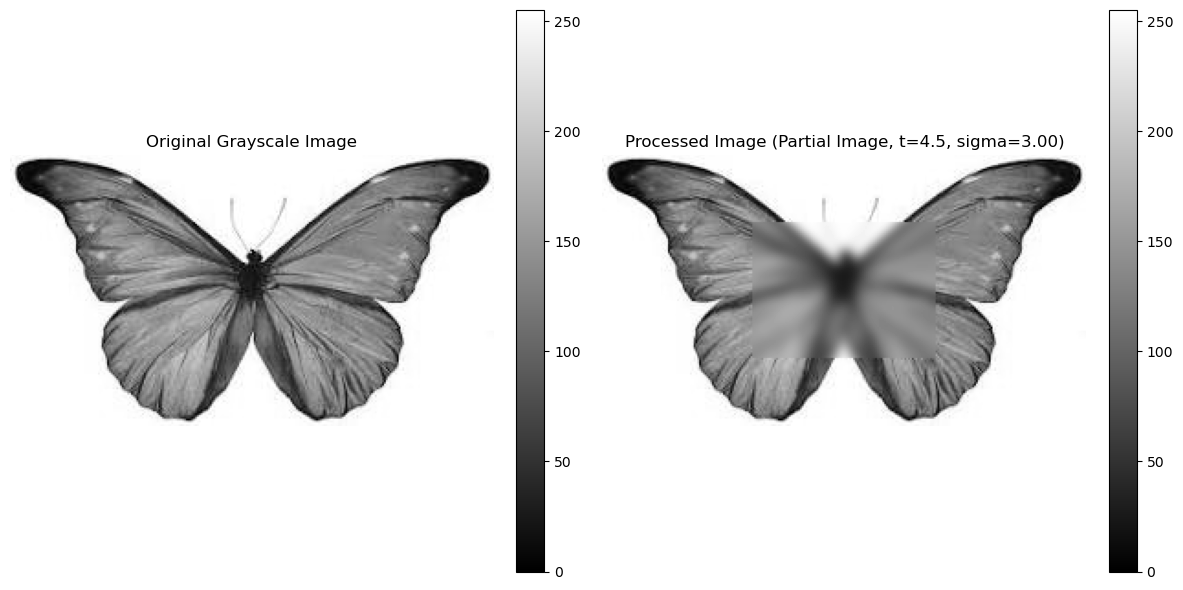

In [75]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def load_and_prepare_image(image_path):
    try:
        img = Image.open(image_path)
        img_gray = img.convert('L')
        img_array = np.array(img_gray)
        return img_array
    except FileNotFoundError:
        print(f"Error: Image file not found at {image_path}. Please check the path.")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

def create_gaussian_kernel(sigma, kernel_size=5):
    if kernel_size % 2 == 0:
        raise ValueError("Kernel size must be an odd number.")

    coords = np.linspace(-(kernel_size // 2), (kernel_size // 2), kernel_size)
    X, Y = np.meshgrid(coords, coords)

    gaussian_values =  (1 /(2 * np.pi * sigma**2)) * np.exp(-(X**2+Y**2) / (2*sigma**2))

    kernel = gaussian_values / np.sum(gaussian_values)

    return kernel


def convolve_2d(image_array_padded, kernel):
    image_height, image_width = image_array_padded.shape
    kernel_height, kernel_width = kernel.shape

    pad_amount = (kernel_height - 1) // 2

    output_height = image_height - 2 * pad_amount
    output_width = image_width - 2 * pad_amount
    
    output_image = np.zeros((output_height, output_width), dtype=image_array_padded.dtype)

    for i in range(output_height):
        for j in range(output_width):
            window = image_array_padded[i : i + kernel_height, j : j + kernel_width]
            
            output_image[i, j] = np.sum(window * kernel)

    return output_image

def blur_region(original_image_array, kernel, roi_x, roi_y, roi_width, roi_height):
    modified_image_array = original_image_array.copy()

    kernel_height, kernel_width = kernel.shape
    pad_amount = (kernel_height - 1) // 2

    img_h, img_w = original_image_array.shape

    padded_extract_y_start = roi_y - pad_amount
    padded_extract_y_end = roi_y + roi_height + pad_amount
    padded_extract_x_start = roi_x - pad_amount
    padded_extract_x_end = roi_x + roi_width + pad_amount

    temp_padded_roi_region = np.zeros((padded_extract_y_end - padded_extract_y_start,
                                       padded_extract_x_end - padded_extract_x_start),
                                      dtype=original_image_array.dtype)

    original_y_start_slice = max(0, padded_extract_y_start)
    original_y_end_slice = min(img_h, padded_extract_y_end)
    original_x_start_slice = max(0, padded_extract_x_start)
    original_x_end_slice = min(img_w, padded_extract_x_end)

    copy_y_start_in_temp = original_y_start_slice - padded_extract_y_start
    copy_x_start_in_temp = original_x_start_slice - padded_extract_x_start
    copy_y_end_in_temp = copy_y_start_in_temp + (original_y_end_slice - original_y_start_slice)
    copy_x_end_in_temp = copy_x_start_in_temp + (original_x_end_slice - original_x_start_slice)

    temp_padded_roi_region[copy_y_start_in_temp:copy_y_end_in_temp,
                           copy_x_start_in_temp:copy_x_end_in_temp] = \
        original_image_array[original_y_start_slice:original_y_end_slice,
                             original_x_start_slice:original_x_end_slice]

    blurred_roi_unpadded = convolve_2d(temp_padded_roi_region, kernel)

    modified_image_array[roi_y : roi_y + roi_height, roi_x : roi_x + roi_width] = blurred_roi_unpadded

    return modified_image_array


def display_images(original_img_array, processed_img_array, title_suffix=""):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    ax1 = axes[0]
    im1 = ax1.imshow(original_img_array, cmap='gray')
    ax1.set_title("Original Grayscale Image")
    ax1.axis('off') 

    ax2 = axes[1]
    im2 = ax2.imshow(processed_img_array, cmap='gray')
    ax2.set_title(f"Processed Image {title_suffix}")
    ax2.axis('off') 

    fig.colorbar(im1, ax=ax1, orientation='vertical', fraction=0.089, pad=0.04)
    fig.colorbar(im2, ax=ax2, orientation='vertical', fraction=0.089, pad=0.04)

    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    image_file = r"C:\Users\Jinpy\download.jpg" 

  
    sigma = 3.0
    kernel_size = 15 
    t_equivalent = sigma**2 / 2

    pad_width = (kernel_size - 3) // 2

    original_image_array = load_and_prepare_image(image_file)

    if original_image_array is not None:
        gaussian_kernel = create_gaussian_kernel(sigma, kernel_size)

        print("\n--- Blurring a specific region ---")
        
        img_h, img_w = original_image_array.shape
        roi_width = min(100, img_w // 2) 
        roi_height = min(100, img_h // 2)
        roi_x = (img_w - roi_width) // 2
        roi_y = (img_h - roi_height) // 2

        print(f"Blurring region: x={roi_x}, y={roi_y}, width={roi_width}, height={roi_height}")

        blurred_partial_image_array = blur_region(original_image_array, gaussian_kernel, roi_x, roi_y, roi_width, roi_height)
        display_images(original_image_array, blurred_partial_image_array, f"(Partial Image, t={t_equivalent}, sigma={sigma:.2f})")

    else:
        print("Image loading failed. Cannot proceed with processing.")



--- Blurring the entire image ---
Channel processing complete.
Blurred RGB image shape: (148, 264, 3)


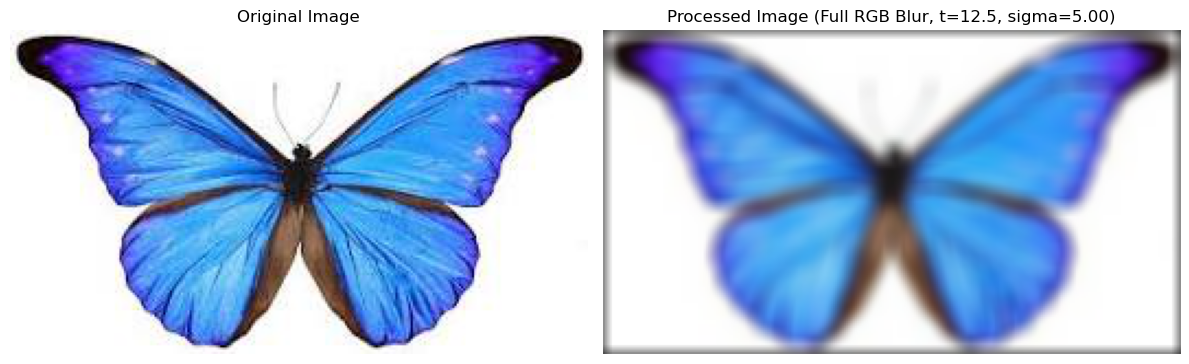

In [78]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


def load_and_prepare_image(image_path):
    try:
        img = Image.open(image_path)
        img_rgb = img.convert('RGB')
        img_array = np.array(img_rgb)
        return img_array
    except FileNotFoundError:
        print(f"Error: Image file not found at {image_path}. Please check the path.")
        return None, None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None, None

def create_gaussian_kernel(sigma, kernel_size):
    if kernel_size % 2 == 0:
        raise ValueError("Kernel size must be an odd number.")

    coords = np.linspace(-(kernel_size // 2), (kernel_size // 2), kernel_size)
    X, Y = np.meshgrid(coords, coords)

    gaussian_values = (1 /(2 * np.pi * sigma**2)) * np.exp(-(X**2+Y**2) / (2*sigma**2))

    kernel = gaussian_values / np.sum(gaussian_values)

    return kernel

def convolve_2d(image_array, kernel):
    image_height, image_width = image_array.shape
    kernel_height, kernel_width = kernel.shape
    
    pad_amount = (kernel_height - 1) // 2

    output_height = image_height - 2 * pad_amount
    output_width = image_width - 2 * pad_amount
    
    output_image = np.zeros((output_height, output_width), dtype=image_array.dtype)

    for i in range(output_height):
        for j in range(output_width):
            window = image_array[i : i + kernel_height, j : j + kernel_width]
            
            output_image[i, j] = np.sum(window * kernel) #This is the dot product. 

    return output_image


def display_images(original_img_array, processed_img_array, title_suffix=""):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    ax1 = axes[0]
    cmap1 = 'gray' if original_img_array.ndim == 2 else None
    im1 = ax1.imshow(original_img_array, cmap=cmap1)
    ax1.set_title("Original Image")
    ax1.axis('off') 
  
    ax2 = axes[1]
    
    cmap2 = 'gray' if processed_img_array.ndim == 2 else None
    im2 = ax2.imshow(processed_img_array, cmap=cmap2)
    ax2.set_title(f"Processed Image {title_suffix}")
    ax2.axis('off') 

    if original_img_array.ndim == 2:
        fig.colorbar(im1, ax=ax1, orientation='vertical', fraction=0.046, pad=0.04)
        fig.colorbar(im2, ax=ax2, orientation='vertical', fraction=0.046, pad=0.04)

    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    image_file = r"C:\Users\Jinpy\download.jpg" 
   
    sigma = 5.0 
    kernel_size = 9
    t_equivalent = sigma**2 / 2

    pad_width = (kernel_size - 1) // 2

    original_rgb_image_array = load_and_prepare_image(image_file)

    if original_rgb_image_array is not None:
        r_channel, g_channel, b_channel = np.split(original_rgb_image_array, 3, axis=2)
        r_channel = r_channel.squeeze()
        g_channel = g_channel.squeeze()
        b_channel = b_channel.squeeze()

        gaussian_kernel = create_gaussian_kernel(sigma, kernel_size)

        print("\n--- Blurring the entire image ---")
        
        padded_r_channel = np.pad(r_channel, pad_width, mode='constant', constant_values=0)
        padded_g_channel = np.pad(g_channel, pad_width, mode='constant', constant_values=0)
        padded_b_channel = np.pad(b_channel, pad_width, mode='constant', constant_values=0)

        blurred_r_channel = convolve_2d(padded_r_channel, gaussian_kernel)
        blurred_g_channel = convolve_2d(padded_g_channel, gaussian_kernel)
        blurred_b_channel = convolve_2d(padded_b_channel, gaussian_kernel)
        print("Channel processing complete.")

        blurred_rgb_image_array = np.stack([blurred_r_channel, blurred_g_channel, blurred_b_channel], axis=2)
        print(f"Blurred RGB image shape: {blurred_rgb_image_array.shape}")

        display_images(original_rgb_image_array, blurred_rgb_image_array, f"(Full RGB Blur, t={t_equivalent}, sigma={sigma:.2f})")

    else:
        print("Image loading failed. Cannot proceed with processing.")
